<a href="https://colab.research.google.com/github/AsmaShaikhTMU/Projects/blob/main/Initial_Results_and_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset Review and ML Model Building

---



## 1. Introduction

**This notebook performs data preprocessing, model building, and analysis on Dataset #1 (Diabetes Dataset)**

## 2. Importing libraries and loading the Dataset:

In [ ]:
# Install necessary libraries (Run only once)
!pip install pandas matplotlib seaborn markdown2 weasyprint

# Import libraries
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 590.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.9/297.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 17.1 MB/s eta 0:00:00


In [ ]:
# dataset 1

import pandas as pd

# Use the RAW URL, not the repository URL
url = "https://raw.githubusercontent.com/AsmaShaikhTMU/Projects/main/diabetes_prediction_dataset.csv"

# Read the CSV file directly from GitHub
df = pd.read_csv(url)

# Display the first few rows
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 3. Cleaning and Preprocessing the Dataset:

In [ ]:
# Display dataset shape (Rows, Columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (100000, 9)


In [ ]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Display dataset info (column types, null values, memory usage)
print("\nDataset Info:")
df.info()
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())

# Print missing values per column

missing_per_column = df.isnull().sum()
total_missing = missing_per_column.sum()  # Calculate total missing values
print(f"\nTotal Missing Values in Dataset: {total_missing}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Duplicate Rows Count: 3854

Total Missing Values in Dataset: 0


**3,854 duplicate rows exist in a dataset of 100,000 rows, they make up about 3.85% of the data**

**There are no missing values**

**Note that Categorical Columns (gender, and smoking_history) object needs one-Hot Encoding or Label Encoding**

**Numerical Columns for age, bmi, HbA1c_level, blood_glucose_level:  Scaling Method is probably needed.**
*   Standardization (for Logistic Regression, SVM,K-Means, KNN, PCA)
*   Min-Max Scaling (Best for Neural Networks)

**Target Column (diabetes) is binary (0 or 1)**


In [ ]:
# Display summary statistics of numerical columns
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# 4. Exploration of Data

## I Univariate Analysis :

####Gender####



In [ ]:
# Count occurrences of each gender category
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [ ]:
# Remove 'Other' category from gender Since "Other" has very few occurrences (only 18 records out of ~100,000)
df = df[df['gender'] != 'Other']

num_var = list(df['gender'].value_counts().values)
labels = list(df['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))

print(num_var)
print(labels)


[np.int64(58552), np.int64(41430)]
['Female', 'Male']


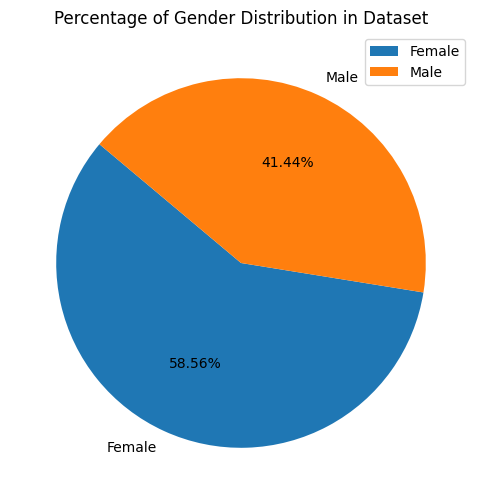

In [ ]:
# Count occurrences of each gender category
gender_counts = df['gender'].value_counts()

# Data for the pie chart
labels = gender_counts.index.tolist()  # Extract unique gender labels
sizes = gender_counts.values  # Extract corresponding counts
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Assign colors
explode = (0, 0, 0.1) if 'Other' in labels else (0, 0)  # Slightly separate 'Other' if it exists

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Gender Distribution in Dataset")
plt.legend(labels, loc="upper right")
plt.show()

**The dataset has 58.56% Female individuals, which forms the majority.*

####Age####

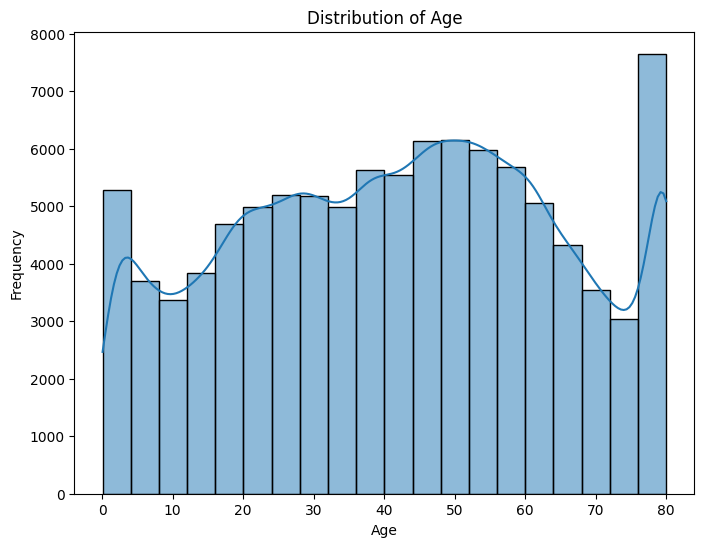

In [ ]:
# prompt: age

import matplotlib.pyplot as plt
#age
# Create a histogram of the 'age' column
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True) # kde=True adds a kernel density estimate curve
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**The dataset includes all age groups, ensuring diversity in the sample.The age distribution is fairly even.There's a higher frequency of individuals near age 80.*


####Hypertension####

In [ ]:
# prompt: hypertension
df['hypertension'].value_counts()


,count
hypertension,
0,92497
1,7485


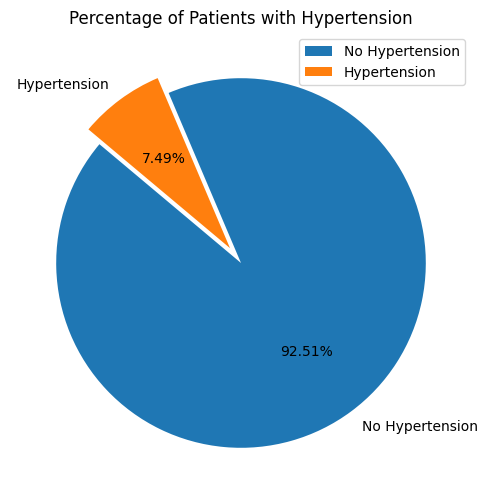

In [ ]:
# Count occurrences of each hypertension category
hypertension_counts = df['hypertension'].value_counts()

# Data for the pie chart
labels = ['No Hypertension', 'Hypertension']
sizes = [hypertension_counts[0], hypertension_counts[1]]  # Extract counts
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Hypertension" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Patients with Hypertension")
plt.legend(labels, loc="upper right")
plt.show()

**Hypertension is relatively rare in the dataset, with only about 7.03% of individuals affected*

####Heart Disease####

In [ ]:
# prompt: heart_disease
df['heart_disease'].value_counts()

,count
heart_disease,
0,96040
1,3942


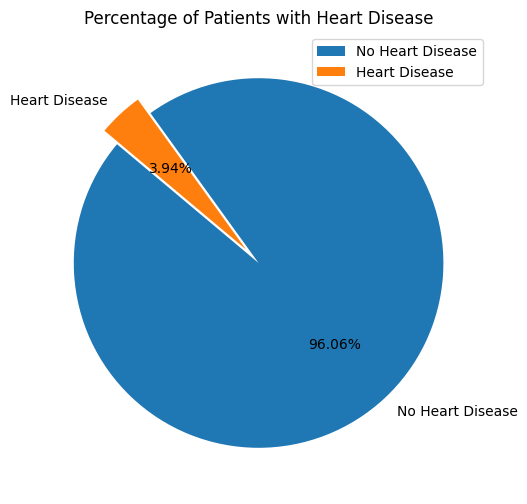

In [ ]:
# Count occurrences of each heart disease category
heart_disease_counts = df['heart_disease'].value_counts()

# Data for the pie chart
labels = ['No Heart Disease', 'Heart Disease']
sizes = [heart_disease_counts[0], heart_disease_counts[1]]  # Extract counts
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Heart Disease" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Patients with Heart Disease")
plt.legend(labels, loc="upper right")
plt.show()

**Heart disease is relatively rare in this dataset, with only ~3.91% of individuals affected. This indicates a highly imbalanced dataset, which can negatively impact machine learning models. Possible Solutions are SMOTE, undersampling, or class weighting technique. Accuracy alone is not a good metric—F1-score, Precision-Recall, and AUC-ROC*



####Smoke History####

In [ ]:
# Count occurrences of each smoking history category
smoking_counts = df['smoking_history'].value_counts().reset_index()
smoking_counts.columns = ['Smoking History', 'Count']

# Calculate frequency (percentage)
smoking_counts['Frequency (%)'] = (smoking_counts['Count'] / df.shape[0]) * 100

# Display the table
print(smoking_counts)

  Smoking History  Count  Frequency (%)
0         No Info  35810      35.816447
1           never  35092      35.098318
2          former   9352       9.353684
3         current   9286       9.287672
4     not current   6439       6.440159
5            ever   4003       4.003721


**35.81% of the records have no smoking history information.Former smokers (9.35%), current smokers (9.28%), and not current (6.44%) are relatively low.

In [ ]:
# Grouping smoking categories into broader groups (former, current, Not Current, and ever into one "Smoked" category).
df["smoking_grouped"] = df["smoking_history"].replace({
    "No Info": "Unknown",
    "never": "Never Smoked",
    "former": "Smoked",
    "current": "Smoked",
    "not current": "Smoked",
    "ever": "Smoked",
})

# Count occurrences of each new category
smoking_counts = df["smoking_grouped"].value_counts().reset_index()
smoking_counts.columns = ["Smoking Group", "Count"]

# Calculate percentage
smoking_counts["Frequency (%)"] = (smoking_counts["Count"] / df.shape[0]) * 100

# Display the results
print(smoking_counts)

  Smoking Group  Count  Frequency (%)
0       Unknown  35810      35.816447
1  Never Smoked  35092      35.098318
2        Smoked  29080      29.085235


**Smoked" category (29.09%) Includes former, current, and ever smokers**

####BMI####

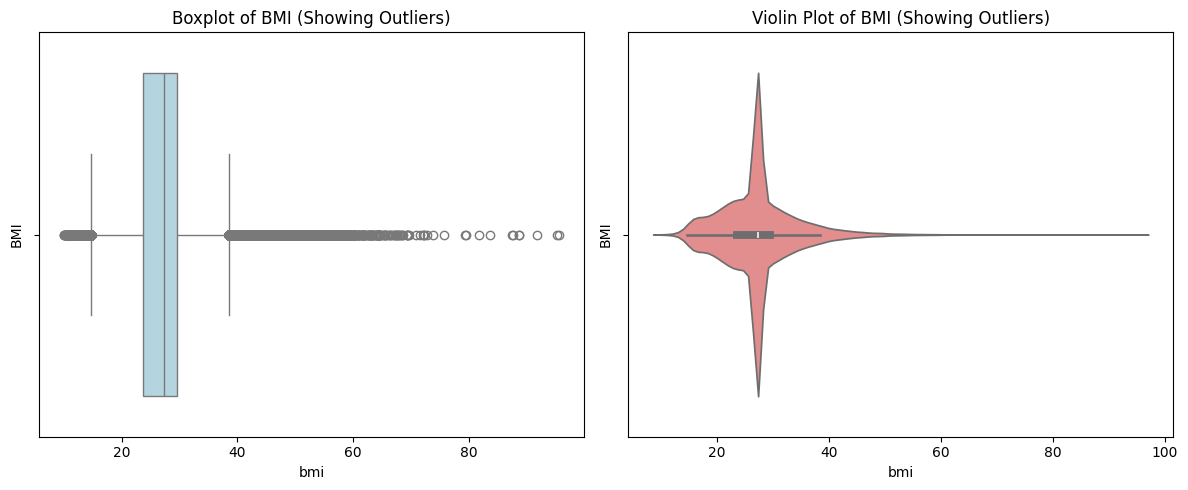

In [ ]:
# prompt: BMI
#print(df.head())

# Set figure size
plt.figure(figsize=(12, 5))

# Create a boxplot for BMI to show outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.boxplot(x=df['bmi'], color='lightblue')
plt.title("Boxplot of BMI (Showing Outliers)")
plt.ylabel("BMI")

# Create a violin plot for BMI to show distribution and outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.violinplot(x=df['bmi'], color='lightcoral')
plt.title("Violin Plot of BMI (Showing Outliers)")
plt.ylabel("BMI")

# Show the plots
plt.tight_layout()
plt.show()


Boxplot: Most BMI values fall between 15 to 35.The median BMI (center line in the box) appears around 25-30. Outliers extend far beyond the usual BMI range

Violin Plot: The most common BMI values (likely between 20 and 30). The long tails suggest the presence of extreme values.



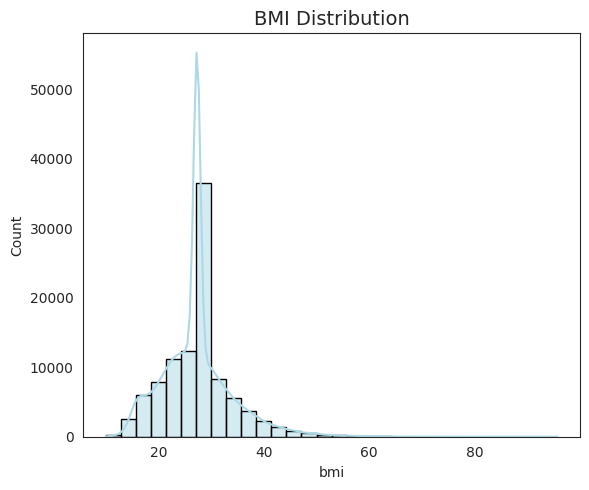

In [ ]:
# Set style without grid
sns.set_style("white")

# Plot histogram with kernel density estimate
plt.figure(figsize=(6, 5))
sns.histplot(df['bmi'], bins=30, kde=True, color='lightblue', edgecolor='black')

# Customize plot
plt.title("BMI Distribution", fontsize=14)
plt.xlabel("bmi")
plt.ylabel("Count")

# Remove grid
plt.grid(False)

# Display plot
plt.tight_layout()
plt.show()



In [ ]:
original_count = df['bmi'].count()
print(f"Original BMI count: {original_count}")

# Step 2: Define outlier bounds using IQR (Interquartile Range)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out BMI outliers
df_bmi_filtered = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Step 4: Check count after removing outliers
filtered_count = df_bmi_filtered['bmi'].count()
print(f"BMI count after removing outliers: {filtered_count}")

# Optional: Show how many were removed
print(f"Number of outliers removed: {original_count - filtered_count}")

Original BMI count: 99982
BMI count after removing outliers: 92897
Number of outliers removed: 7085


BMI Summary After Outlier Clipping:
count    99982.000000
mean        26.991610
std          5.671332
min         14.705000
25%         23.630000
50%         27.320000
75%         29.580000
max         38.505000
Name: bmi, dtype: float64


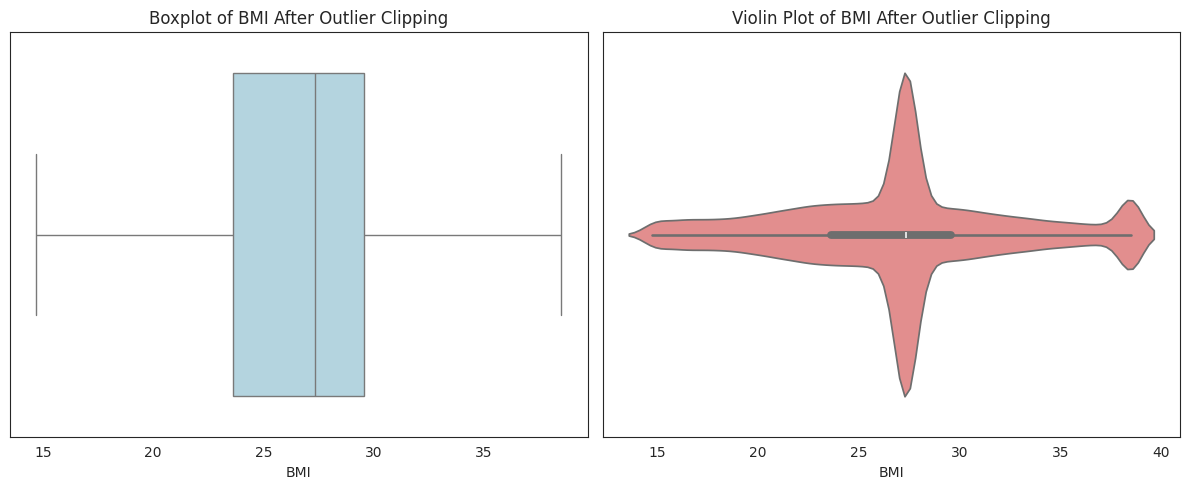

In [ ]:
# 1. Calculate IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Clip BMI values (winsorization, not removal)
df['bmi'] = df['bmi'].clip(lower=lower_bound, upper=upper_bound)

# 3. Print BMI summary after clipping
print("BMI Summary After Outlier Clipping:")
print(df['bmi'].describe())

# 4. Plot Boxplot and Violin Plot side by side
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'], color='lightblue')
plt.title("Boxplot of BMI After Outlier Clipping")
plt.xlabel("BMI")
plt.ylabel("")

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='bmi', data=df, color='lightcoral')
plt.title("Violin Plot of BMI After Outlier Clipping")
plt.xlabel("BMI")
plt.ylabel("")

plt.tight_layout()
plt.show()






####HbA1c_level ####

In [ ]:
# prompt: HbA1c_level


# Get the range of HbA1c levels
hbA1c_min = df['HbA1c_level'].min()
hbA1c_max = df['HbA1c_level'].max()

# Define HbA1c categories
hbA1c_bins = [0, 5.7, 6.4, float('inf')]
hbA1c_labels = ['≤ 5.7% (Non-Diabetic)', '5.7% - 6.4% (Prediabetic)', '≥ 6.5% (Diabetic)']

# Categorize patients based on HbA1c levels
df['HbA1c_Category'] = pd.cut(df['HbA1c_level'], bins=hbA1c_bins, labels=hbA1c_labels, include_lowest=True)

# Count occurrences in each category
hbA1c_counts = df['HbA1c_Category'].value_counts().reset_index()
hbA1c_counts.columns = ['HbA1c Category', 'Count']

# Calculate percentage
hbA1c_counts['Percentage (%)'] = (hbA1c_counts['Count'] / df.shape[0]) * 100

# Display the results
print(f"HbA1c levels range from {hbA1c_min}% to {hbA1c_max}%.\n")
print(hbA1c_counts)


HbA1c levels range from 3.5% to 9.0%.

              HbA1c Category  Count  Percentage (%)
0      ≤ 5.7% (Non-Diabetic)  46262       46.270329
1  5.7% - 6.4% (Prediabetic)  32926       32.931928
2          ≥ 6.5% (Diabetic)  20794       20.797744


**categorizes HbA1c levels into Non-Diabetic, Prediabetic, and Diabetic groups and calculates their proportions*

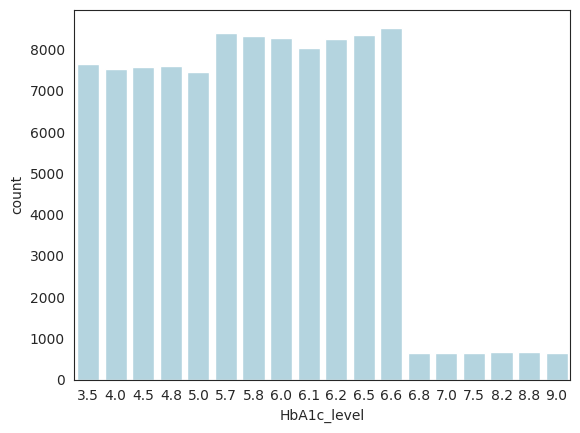

In [ ]:
# HbA1c_level :
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = df['HbA1c_level'], color='lightblue');

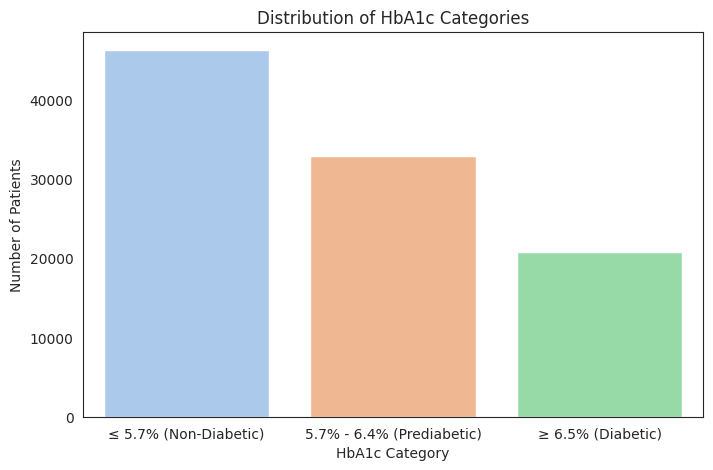

In [ ]:
import matplotlib.pyplot as plt
# Plotting the histogram for HbA1c Categories (American Diabetes Association - ADA)
plt.figure(figsize=(8, 5))
sns.countplot(x='HbA1c_Category', data=df, hue='HbA1c_Category', palette='pastel', legend=False)  # Set hue and legend
plt.title('Distribution of HbA1c Categories')
plt.xlabel('HbA1c Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()


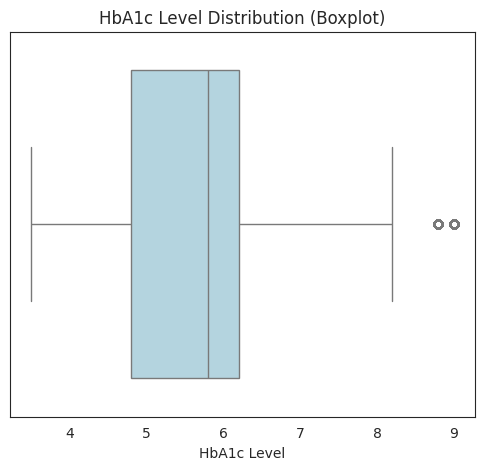

In [ ]:
# Plot a boxplot for HbA1c level distribution
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['HbA1c_level'], color="lightblue")
plt.title("HbA1c Level Distribution (Boxplot)")
plt.xlabel("HbA1c Level")
plt.show()

####Blood Glucose Level ####

In [ ]:
# Count occurrences of each Blood Glucose Level
blood_glucose_distribution = df['blood_glucose_level'].value_counts().reset_index()
blood_glucose_distribution.columns = ['Blood Glucose Level', 'Count']

# Display the distribution table
print(blood_glucose_distribution)

    Blood Glucose Level  Count
0                   130   7794
1                   159   7756
2                   140   7730
3                   160   7708
4                   126   7700
5                   145   7679
6                   200   7599
7                   155   7575
8                    90   7110
9                    80   7105
10                  100   7025
11                  158   7024
12                   85   6900
13                  280    729
14                  300    674
15                  240    636
16                  260    635
17                  220    603


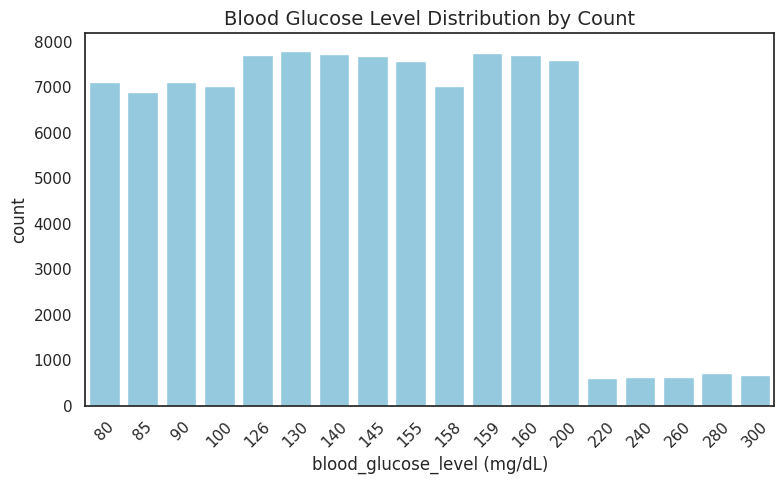

In [ ]:
# Set Seaborn style
sns.set(style="white")

# Create bar plot with sorted blood glucose levels
plt.figure(figsize=(8, 5))
sns.countplot(x='blood_glucose_level', data=df, color='skyblue')

# Customize axis and title
plt.title("Blood Glucose Level Distribution by Count", fontsize=14)
plt.xlabel("blood_glucose_level (mg/dL)")
plt.ylabel("count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


####Target variable diabetes####

In [ ]:
#Target variable diabetes
labels = list(df['diabetes'].value_counts().index)
num_var = list(df['diabetes'].value_counts().values)
print(labels)

[0, 1]


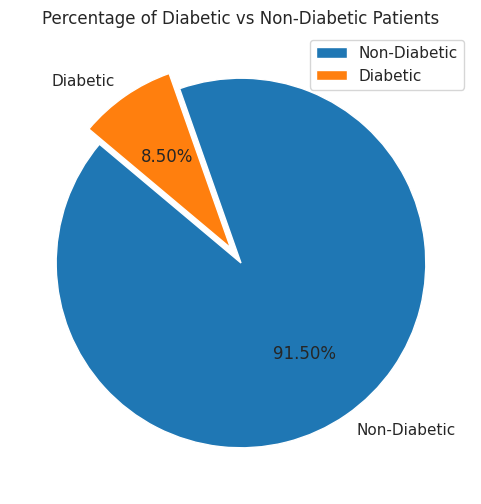

In [ ]:
# Count occurrences of diabetic vs non-diabetic cases
diabetes_counts = df['diabetes'].value_counts().to_dict()  # Convert to dictionary to avoid KeyError

# Ensure both labels exist in the correct order
sizes = [diabetes_counts.get(0, 0), diabetes_counts.get(1, 0)]  # Handles cases where values might be missing
labels = ['Non-Diabetic', 'Diabetic']
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Diabetic" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Diabetic vs Non-Diabetic Patients")
plt.legend(labels, loc="upper right")
plt.show()


**Given that diabetic cases about 8.5% of the dataset (high imbalance), the best approach should enhance the minority class representation.

Method 1: oversampling with SMOTE.

Method 2: Class Weight Adjustment in Models helps the model give more importance to the minority class.

Method 3: Use Recall & F1 Score for Model Evaluation (recall to ensure diabetic cases are detected and F1-score to balance precision & recall (instead of accuracy)**



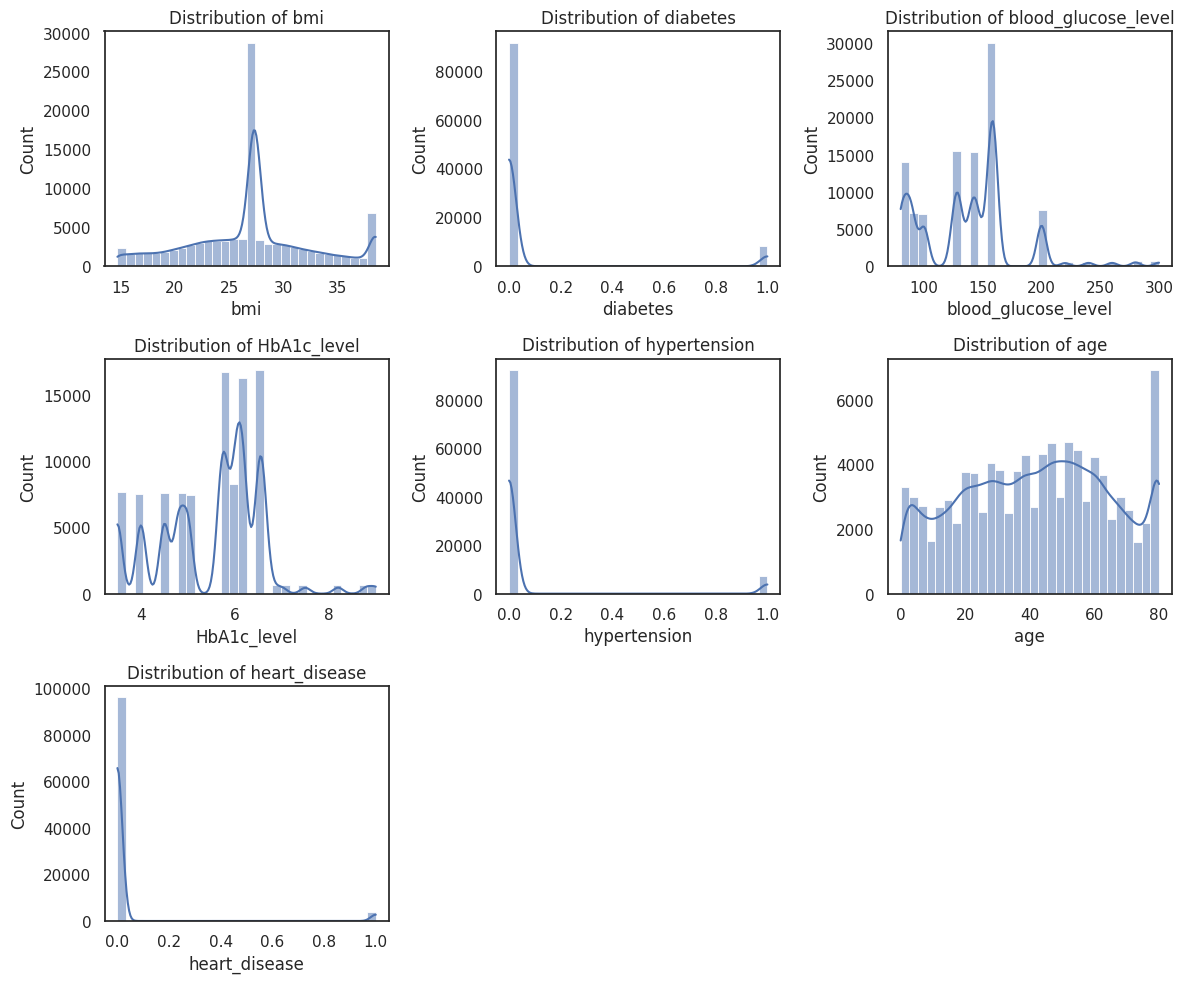

In [ ]:
# Distribution plots for all variables
variables = ['bmi', 'diabetes', 'blood_glucose_level', 'HbA1c_level', 'hypertension', 'age', 'heart_disease']
plt.figure(figsize=(12, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

**Blood Glucose is multi-modal distribution.

BMI is right-skewed distribution.

HbA1c Level is uneven distribution.

The age distribution appears relatively uniform but with peaks around 60-80 years. A higher count of older individuals suggests a dataset focused on age-related health conditions.

There is a notable imbalance, with far fewer cases of heart disease.*

## II. Bivariate Analysis

**In this section, the relationships between two variables and if possible, create new features combining them for better visualization**

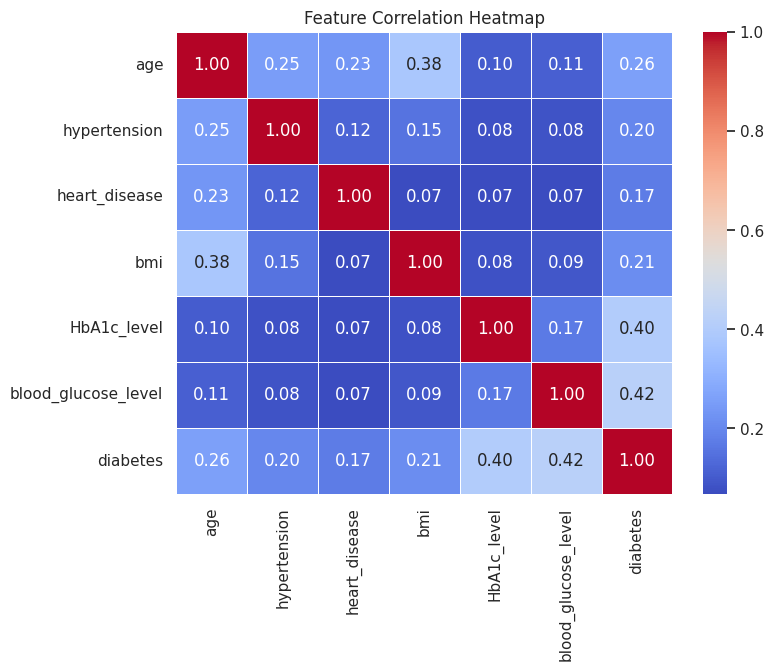

In [ ]:
#Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Diabetes Correlation:

Blood Glucose Level (0.42): Strongest correlation - diabetes is diagnosed based on high blood sugar.

HbA1c Level (0.40): Strong correlation with diabetics.

Age (0.26):Moderate correlations

Hypertension (0.20):Moderate correlations

BMI (0.21): Moderate correlations

### 1. HbA1c_level vs. diabetes:

**Question: What percentage of individuals with HbA1c levels above 6.5% have diabetes?**

HbA1c_level

A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.
we will create a new feature bassed on the value of (HbA1C)

HbA1c level	initial diagnosis
1. < 5.7	Normal
2. 5.7 – 6.4	Prediabetes
3. greater or equal 6.5	Diabetes

Resource : https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [ ]:
# Calculate percentage of individuals with HbA1c > 6.5% who have diabetes

diabetic_hba1c = df[(df['HbA1c_level'] > 6.5) & (df['diabetes'] == 1)].shape[0]
total_hba1c_above_6_5 = df[df['HbA1c_level'] > 6.5].shape[0]

if total_hba1c_above_6_5 > 0:
    percentage_diabetic_hba1c = (diabetic_hba1c / total_hba1c_above_6_5) * 100
    print(f"Percentage of individuals with HbA1c > 6.5% who have diabetes: {percentage_diabetic_hba1c:.2f}%")
else:
    print("No individuals with HbA1c > 6.5% in the dataset.")

Percentage of individuals with HbA1c > 6.5% who have diabetes: 36.82%


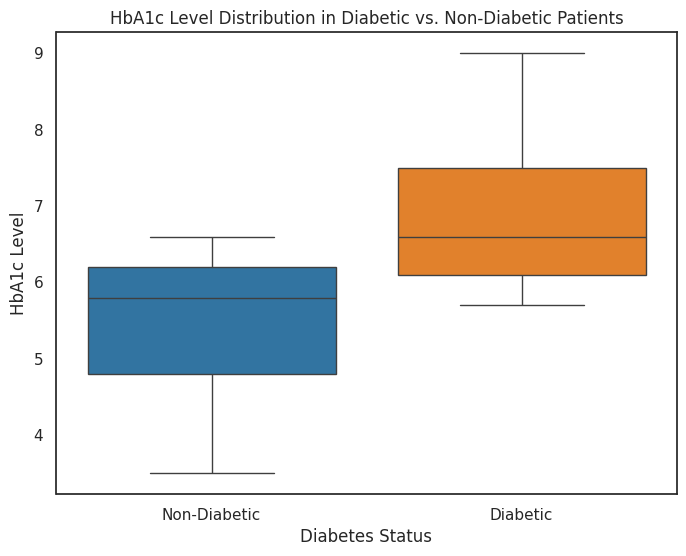

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="diabetes", y="HbA1c_level", data=df, hue="diabetes", palette={0: "#1f77b4", 1: "#ff7f0e"}, legend=False)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title("HbA1c Level Distribution in Diabetic vs. Non-Diabetic Patients")
plt.xlabel("Diabetes Status")
plt.ylabel("HbA1c Level")
plt.show()


### 2. bmi vs diabetes:

**Question: Does BMI above 30 increase the likelihood of diabetes by more than 50% compared to normal-weight individuals?**

BMI	Category
*   =< 18.5	Underweight
*   18.5 – 24.9	Normal
*   25 – 29.9	Overweight
*   Greater than 30	Obesity

https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test https://www.cdc.gov/diabetes/basics/getting-tested.html

In [ ]:
# Compute correlation matrix using actual column names
correlation_matrix = df[['bmi', 'diabetes', 'blood_glucose_level', 'HbA1c_level']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                           bmi  diabetes  blood_glucose_level  HbA1c_level
bmi                  1.000000  0.209684             0.090496     0.081491
diabetes             0.209684  1.000000             0.419587     0.400696
blood_glucose_level  0.090496  0.419587             1.000000     0.166831
HbA1c_level          0.081491  0.400696             0.166831     1.000000


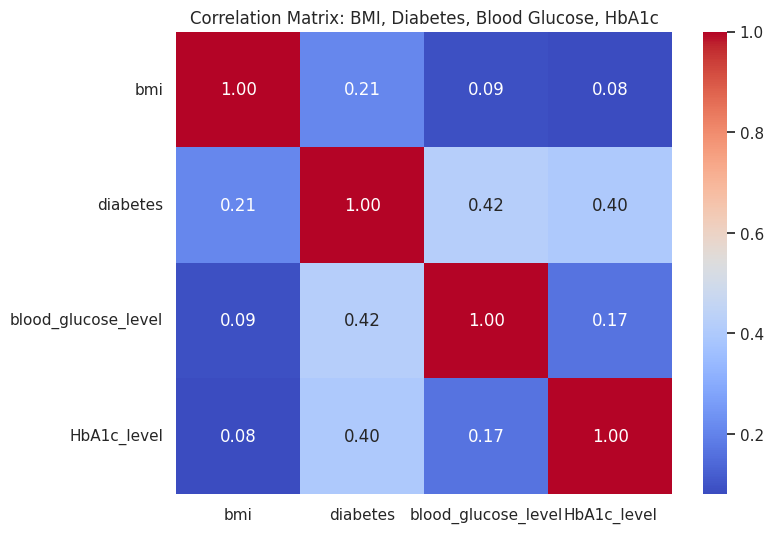

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: BMI, Diabetes, Blood Glucose, HbA1c")
plt.show()

In [ ]:
# Define obesity threshold
df['Obese'] = df['bmi'] > 30
# Calculate diabetes risk for obese vs. non-obese
obese_diabetes_rate = df[df['Obese']]['diabetes'].mean()
non_obese_diabetes_rate = df[~df['Obese']]['diabetes'].mean()
print(f"Diabetes rate in obese individuals: {obese_diabetes_rate:.2%}")
print(f"Diabetes rate in non-obese individuals: {non_obese_diabetes_rate:.2%}")

Diabetes rate in obese individuals: 18.03%
Diabetes rate in non-obese individuals: 5.58%


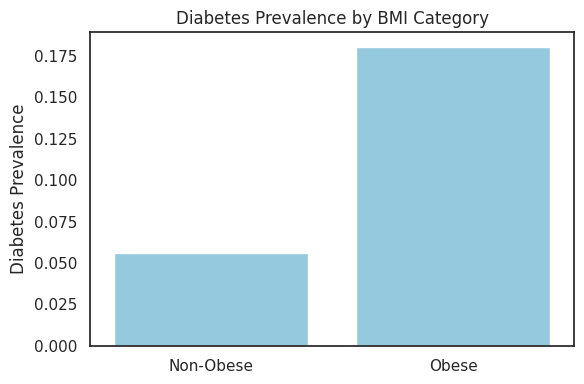

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=['Non-Obese', 'Obese'],
            y=[non_obese_diabetes_rate, obese_diabetes_rate],
            color='skyblue')

# Labels and title
plt.ylabel("Diabetes Prevalence")
plt.title("Diabetes Prevalence by BMI Category")

plt.tight_layout()
plt.show()


In [ ]:
# Define BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['BMI_Category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

# Calculate percentage of diabetics in each BMI category
bmi_diabetes_counts = df.groupby('BMI_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
bmi_table = pd.DataFrame({
    'BMI Category': bmi_labels,
    'Prediction': [f"{bmi_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in bmi_labels]
})

# Display the table
print(bmi_table)


  BMI Category            Prediction
0  Underweight   0.75% have diabetes
1       Normal   3.84% have diabetes
2   Overweight   7.25% have diabetes
3      Obesity  17.92% have diabetes


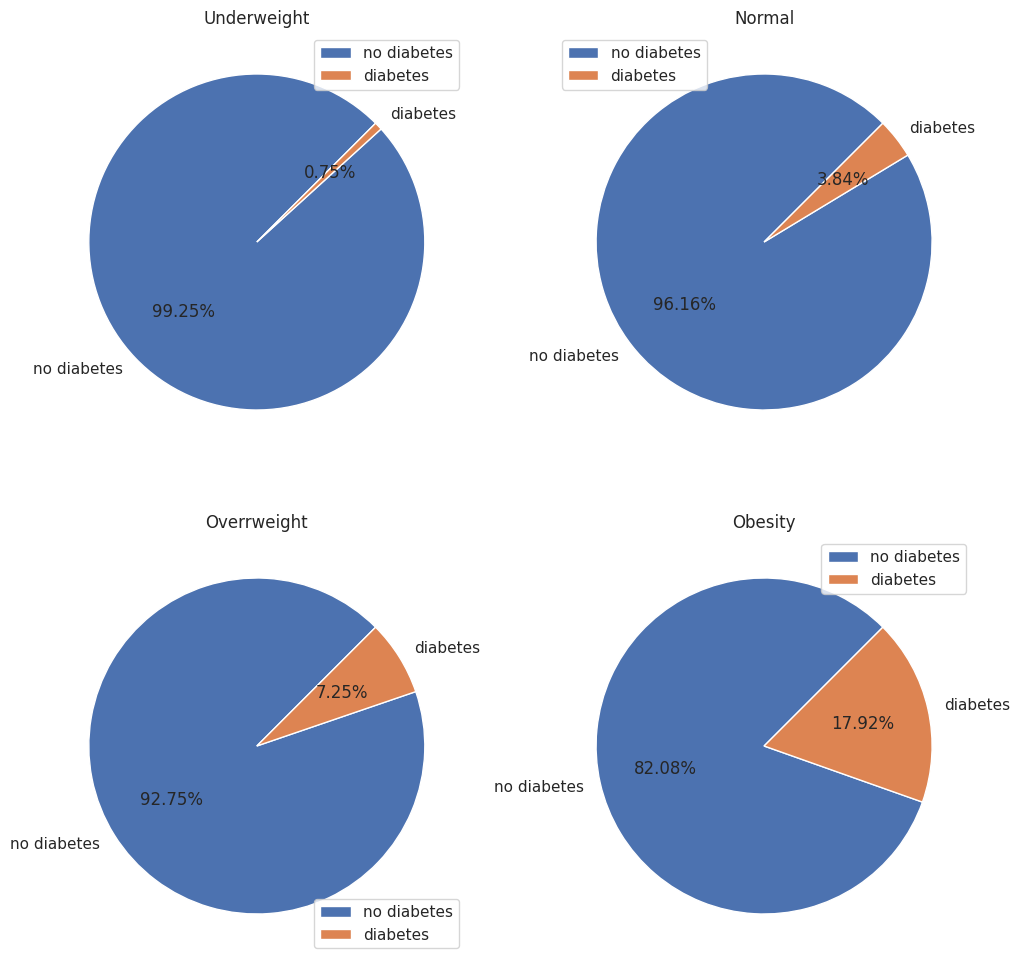

In [ ]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [12,12]);

# Assuming 'bmi' is used to determine weight type
# Define BMI categories and corresponding weight types
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
weight_types = ['Underweight', 'Normal', 'Overweight', 'Obesity']

# Create a new 'weight_type' column based on BMI categories
df['weight_type'] = pd.cut(df['bmi'], bins=bmi_bins, labels=weight_types, include_lowest=True)

plt.subplot(2,2,1);
plt.pie(df[df['weight_type'] == 'Underweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('Underweight')
plt.legend();

plt.subplot(2,2,2);
plt.pie(df[df['weight_type'] == 'Normal']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Normal')
plt.legend();

plt.subplot(2,2,3);
plt.pie(df[df['weight_type'] == 'Overweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Overrweight')
plt.legend();

plt.subplot(2,2,4);
plt.pie(df[df['weight_type'] == 'Obesity']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Obesity')
plt.legend();

### 3. blood_glucose_level vs diabetes

**Question: What is the mean blood glucose level for diabetic vs. non-diabetic individuals?**

Glucose levels can be categorized as follows:
•	≤ 99 mg/dL: Normal
•	100 – 125 mg/dL: Prediabetic
•	≥ 126 mg/dL: Diabetic


<b> Resources : </b>
<a>  https://www.cdc.gov/diabetes/basics/getting-tested.html </a>



In [ ]:
# Calculate mean blood glucose level for diabetic vs. non-diabetic individuals
mean_glucose_diabetic = df[df['diabetes'] == 1]['blood_glucose_level'].mean()
mean_glucose_non_diabetic = df[df['diabetes'] == 0]['blood_glucose_level'].mean()

print(f"Mean Blood Glucose Level for Diabetic Individuals: {mean_glucose_diabetic:.2f}")
print(f"Mean Blood Glucose Level for Non-Diabetic Individuals: {mean_glucose_non_diabetic:.2f}")

Mean Blood Glucose Level for Diabetic Individuals: 194.09
Mean Blood Glucose Level for Non-Diabetic Individuals: 132.85


In [ ]:
# Calculate mean blood glucose level for diabetic vs. non-diabetic individuals
median_glucose_diabetic = df[df['diabetes'] == 1]['blood_glucose_level'].median()
median_glucose_non_diabetic = df[df['diabetes'] == 0]['blood_glucose_level'].median()

print(f"median Blood Glucose Level for Diabetic Individuals: {median_glucose_diabetic:.2f}")
print(f"median Blood Glucose Level for Non-Diabetic Individuals: {median_glucose_non_diabetic:.2f}")

median Blood Glucose Level for Diabetic Individuals: 160.00
median Blood Glucose Level for Non-Diabetic Individuals: 140.00


In [ ]:
# Define Blood Glucose Level categories
glucose_bins = [0, 99, 125, float('inf')]
glucose_labels = ['≤ 99', '100 – 125', '≥ 126']
df['Glucose_Category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Calculate percentage of diabetics in each Blood Glucose Level category
glucose_diabetes_counts = df.groupby('Glucose_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
glucose_table = pd.DataFrame({
    'Blood Glucose Level': glucose_labels,
    'Prediction': [f"{glucose_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in glucose_labels]
})

# Display the table
print(glucose_table)



  Blood Glucose Level            Prediction
0                ≤ 99   0.00% have diabetes
1           100 – 125   0.00% have diabetes
2               ≥ 126  11.83% have diabetes


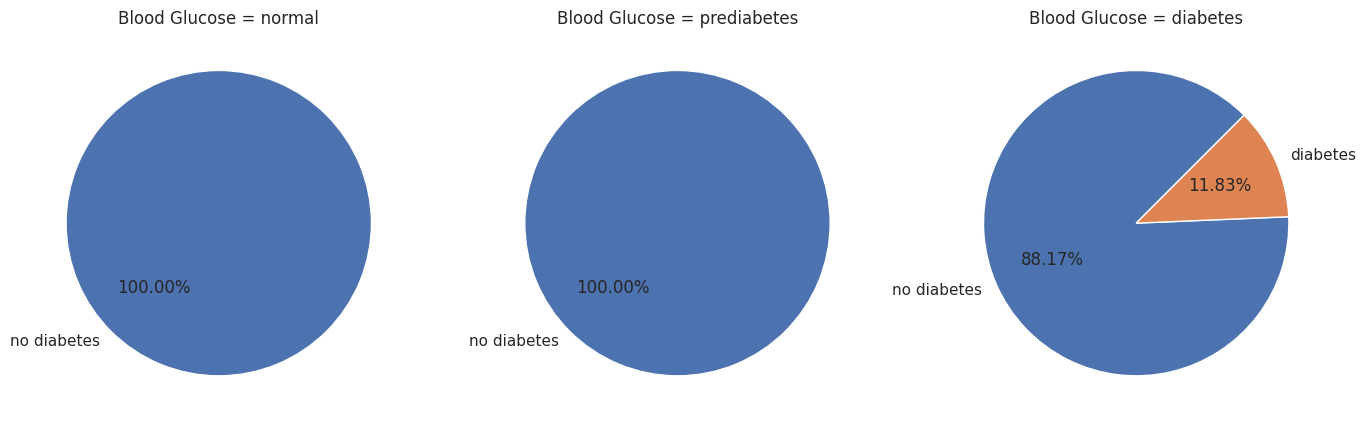

In [ ]:
# Step 1: Convert to numeric and handle errors
df['blood_glucose_level'] = pd.to_numeric(df['blood_glucose_level'], errors='coerce')

# Step 2: Drop rows with missing glucose values (optional)
df = df.dropna(subset=['blood_glucose_level'])

# Step 3: Define glucose bins and labels
glucose_bins = [0, 99, 125, float('inf')]
blood_glucose_level_labels = ['normal', 'prediabetes', 'diabetes']

# Step 4: Create categorized column
df['blood_glucose_level_cat'] = pd.cut(df['blood_glucose_level'],
                                       bins=glucose_bins,
                                       labels=blood_glucose_level_labels,
                                       include_lowest=True)

# Step 5: Plot pie charts
plt.figure(figsize=(14, 6))

categories = ['normal', 'prediabetes', 'diabetes']

for i, cat in enumerate(categories):
    plt.subplot(1, 3, i + 1)

    subset = df[df['blood_glucose_level_cat'] == cat]['diabetes']
    counts = subset.value_counts()
    labels = ['no diabetes' if val == 0 else 'diabetes' for val in counts.index]

    plt.pie(counts.values, labels=labels, autopct='%1.2f%%', startangle=45)
    plt.title(f'Blood Glucose = {cat}')

plt.tight_layout()
plt.show()


**all patients with diabetes have high sugar test result ( > 126)**

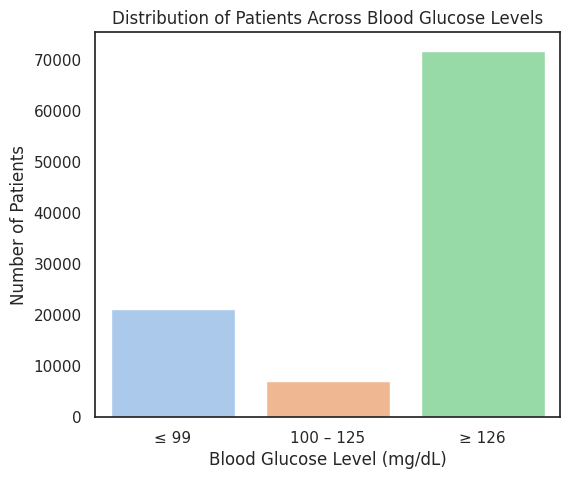

In [ ]:
# Define Blood Glucose Level categories
glucose_bins = [0, 99, 125, float('inf')]
glucose_labels = ['≤ 99', '100 – 125', '≥ 126']
df['Glucose_Category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Plot a bar chart for blood glucose categories (Fixing FutureWarning)
plt.figure(figsize=(6, 5))
sns.countplot(x="Glucose_Category", data=df, hue="Glucose_Category", palette="pastel", legend=False)
plt.title("Distribution of Patients Across Blood Glucose Levels")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Number of Patients")
plt.show()



#### all patients with diabetes have high sugar test result ( > 126)

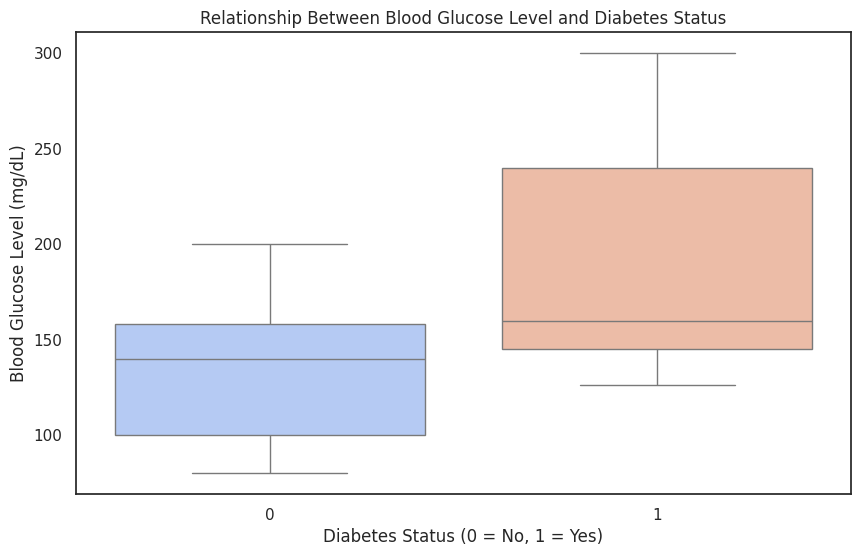

In [ ]:
# Plot the distribution of Blood Glucose Levels vs. Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['diabetes'], y=df['blood_glucose_level'], hue=df['diabetes'], palette="coolwarm", legend=False)

# Set plot labels and title
plt.title("Relationship Between Blood Glucose Level and Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Blood Glucose Level (mg/dL)")

# Show the plot
plt.show()


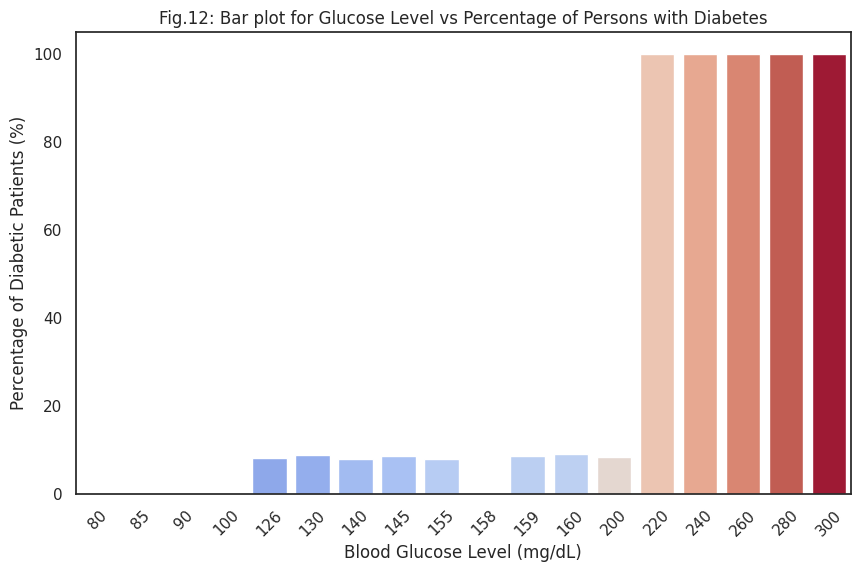

In [ ]:
# Group data by blood glucose level and count diabetes cases
blood_glucose_summary = df.groupby('blood_glucose_level').agg(
    diabetes=('diabetes', 'sum'),  # Count of diabetes cases
    total=('diabetes', 'count')  # Total instances per blood glucose level
).reset_index()

# Calculate the percentage of diabetes cases for each blood glucose level
blood_glucose_summary['percentage'] = (blood_glucose_summary['diabetes'] / blood_glucose_summary['total']) * 100

# Create a bar plot for Blood Glucose Level vs Percentage of Persons with Diabetes (Fixing FutureWarning)
plt.figure(figsize=(10, 6))
sns.barplot(x="blood_glucose_level", y="percentage", data=blood_glucose_summary, hue="blood_glucose_level", palette="coolwarm", legend=False)

# Customize the plot
plt.title("Fig.12: Bar plot for Glucose Level vs Percentage of Persons with Diabetes")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Percentage of Diabetic Patients (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


* Patients with **['blood_glucose_level']** between **126 to 200** , around 7.5 of them have already diabetes and that whose **['blood_glucose_level'] >= 220** , all of then have accually diabetes .

### 4. hypertension vs bmi

In [ ]:
# Question: What is the average BMI for individuals with and without hypertension?
mean_bmi_hypertension = df[df['hypertension'] == 1]['bmi'].mean()
mean_bmi_no_hypertension = df[df['hypertension'] == 0]['bmi'].mean()

print(f"Mean BMI for individuals with Hypertension: {mean_bmi_hypertension:.2f}")
print(f"Mean BMI for individuals without Hypertension: {mean_bmi_no_hypertension:.2f}")

Mean BMI for individuals with Hypertension: 30.01
Mean BMI for individuals without Hypertension: 26.75


In [ ]:
# Question: What is the median BMI for individuals with and without hypertension?
median_bmi_hypertension = df[df['hypertension'] == 1]['bmi'].median()
median_bmi_no_hypertension = df[df['hypertension'] == 0]['bmi'].median()

print(f"Median BMI for individuals with Hypertension: {median_bmi_hypertension:.2f}")
print(f"Median BMI for individuals without Hypertension: {median_bmi_no_hypertension:.2f}")

Median BMI for individuals with Hypertension: 28.70
Median BMI for individuals without Hypertension: 27.32


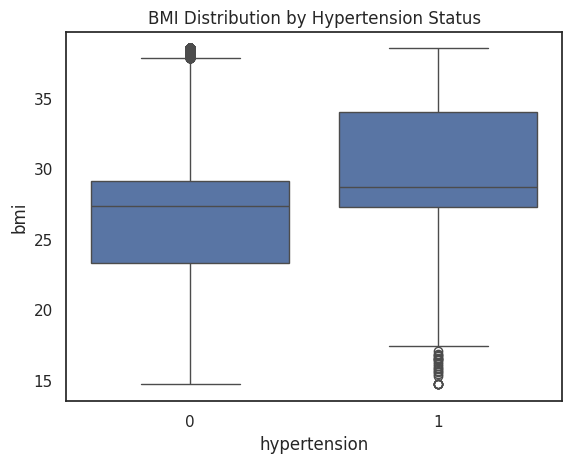

In [ ]:
sns.boxplot(x=df['hypertension'], y=df['bmi'])
plt.title("BMI Distribution by Hypertension Status")
plt.show()


### 5. Age vs Heart Disease

Age & Diabetes: 0.272 (Moderate correlation)

Age & Hypertension: 0.260 (Moderate correlation)

Age & Heart Disease: 0.266 (Moderate correlation)

In [ ]:
# Question: What is the median age of individuals with and without heart disease?
median_age_heart_disease = df[df['heart_disease'] == 1]['age'].median()
median_age_no_heart_disease = df[df['heart_disease'] == 0]['age'].median()

print(f"Median Age for individuals with Heart Disease: {median_age_heart_disease:.2f}")
print(f"Median Age for individuals without Heart Disease: {median_age_no_heart_disease:.2f}")


Median Age for individuals with Heart Disease: 70.00
Median Age for individuals without Heart Disease: 41.00


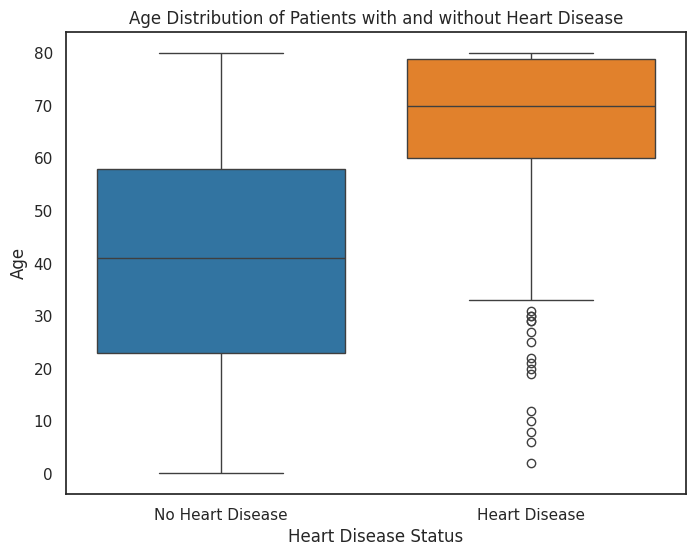

In [ ]:
# Comparing the age distribution of patients with and without heart disease.
# Create a boxplot to compare age distribution between patients with and without heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x="heart_disease", y="age", data=df, hue="heart_disease", palette={0: "#1f77b4", 1: "#ff7f0e"}, legend=False)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.title("Age Distribution of Patients with and without Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Age")
plt.show()




#Hypothesis Testing

####T-test: Compare blood glucose levels between diabetic and non-diabetic individuals.

Use a T-Test when:
Target (diabetic vs. non-diabetic patients).
Continuous variable (e.g., blood glucose levels, BMI, HbA1c levels).

In [ ]:
import scipy.stats as stats

glucose_diabetic = df[df['diabetes'] == 1]['blood_glucose_level']  # Use actual column names
glucose_non_diabetic = df[df['diabetes'] == 0]['blood_glucose_level']  # Use actual column names

t_stat, p_value_ttest = stats.ttest_ind(glucose_diabetic, glucose_non_diabetic, equal_var=False)

print(f"T-Test Results (Blood Glucose vs Diabetes):")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value_ttest:.4f}")
print("Significant Difference" if p_value_ttest < 0.05 else "No Significant Difference")
print("-" * 50)



T-Test Results (Blood Glucose vs Diabetes):
T-Statistic: 94.7966, P-Value: 0.0000
Significant Difference
--------------------------------------------------


**Since the p-value is much lower than 0.05, we reject the null hypothesis. There is a significant difference in blood glucose levels between diabetic and non-diabetic individuals. Blood glucose is a strong differentiator for diabetes.**

####Chi-Square Test: Check if hypertension and diabetes are significantly associated.

The Chi-Square Test is a statistical test used to determine whether there is a significant association between two categorical variables

In [ ]:
contingency_table = pd.crosstab(df['hypertension'], df['diabetes'])
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Results (Hypertension vs Diabetes):")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {p_value_chi2:.4f}")
print("Significant Association" if p_value_chi2 < 0.05 else "No Significant Association")
print("-" * 50)



Chi-Square Test Results (Hypertension vs Diabetes):
Chi-Square Statistic: 3909.5098, P-Value: 0.0000
Significant Association
--------------------------------------------------


**There is strong statistical association between hypertension and diabetes. This means that individuals with hypertension are significantly more likely to have diabetes.**

# Updated Predictive Modeling

# SUMMARY OF CODE

In [ ]:
X = df.drop("diabetes", axis=1)  # All input features
y = df["diabetes"]               # Target column

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify column types
categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(include='number').columns

# Create column transformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Define models with random_state where supported
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),  # No random_state
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


Logistic Regression
Mean CV Score: 0.9608
Test Accuracy: 0.9595
Precision:     0.8790
Recall:        0.6304
F1 Score:      0.7343
F2 Score:      0.6682

KNN
Mean CV Score: 0.9603
Test Accuracy: 0.9594
Precision:     0.9017
Recall:        0.6096
F1 Score:      0.7274
F2 Score:      0.6518

Decision Tree
Mean CV Score: 0.9519
Test Accuracy: 0.9518
Precision:     0.7221
Recall:        0.7437
F1 Score:      0.7327
F2 Score:      0.7392

Random Forest
Mean CV Score: 0.9697
Test Accuracy: 0.9687
Precision:     0.9423
Recall:        0.6896
F1 Score:      0.7964
F2 Score:      0.7287

SVM
Mean CV Score: 0.9636
Test Accuracy: 0.9618
Precision:     0.9847
Recall:        0.5786
F1 Score:      0.7289
F2 Score:      0.6306

📊 Results Table:
                      Mean CV Score  Test Score  Accuracy  Precision    Recall  \
Model                                                                           
Logistic Regression       0.960805    0.959494  0.959494   0.879026  0.630423   
KNN              

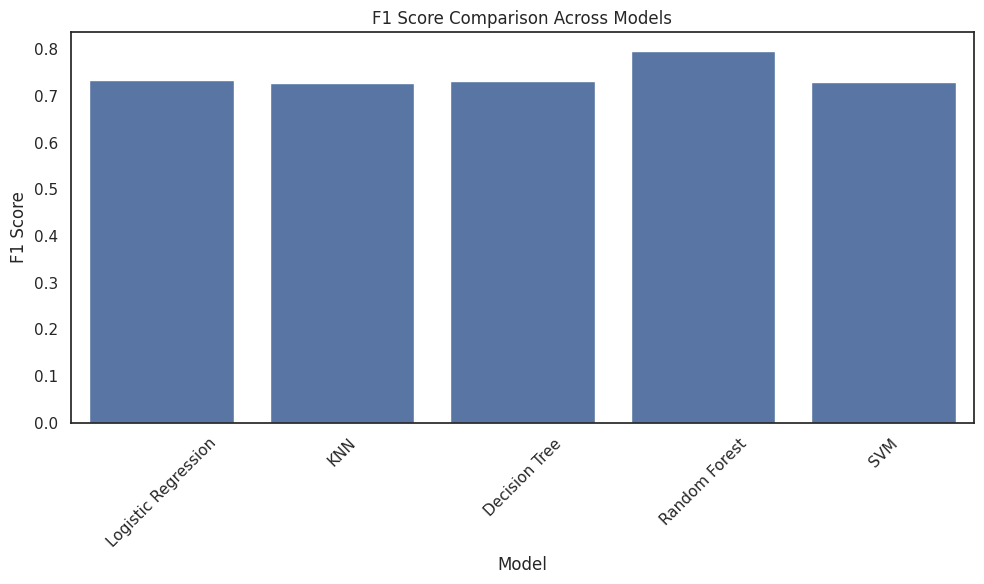

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score  # Needed for F2 Score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list to store model results
results = []

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    #Pipeline to combine preprocessing and modeling
    #applies all transformations inside cross-validation (no data leakage and Only Training Folds Are Used to Fit the Encoder and Scaler )
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
#cross_val_score() on the training set to ensure every fold re-fits the encoder and scaler on the training part of that fold
    #Inside cross-validation: The model splits your data into 5 parts (folds). In each round, it trains on 4 folds and tests on 1.

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_score = pipeline.score(X_test, y_test)

    results.append({
        'Model': name,
        'Mean CV Score': cv_scores.mean(),
        'Test Score': test_score,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1 Score': f1_score(y_test, y_pred, average='binary'),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2, average='binary')
    })

    print(f"\n{name}")
    print(f"Mean CV Score: {cv_scores.mean():.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print(f"Precision:     {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:        {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:      {f1_score(y_test, y_pred):.4f}")
    print(f"F2 Score:      {fbeta_score(y_test, y_pred, beta=2):.4f}")


# Create results DataFrame
results_df = pd.DataFrame(results).set_index('Model')
print("\n📊 Results Table:\n", results_df)

# Plot F1 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index(), x='Model', y='F1 Score')
plt.title("F1 Score Comparison Across Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


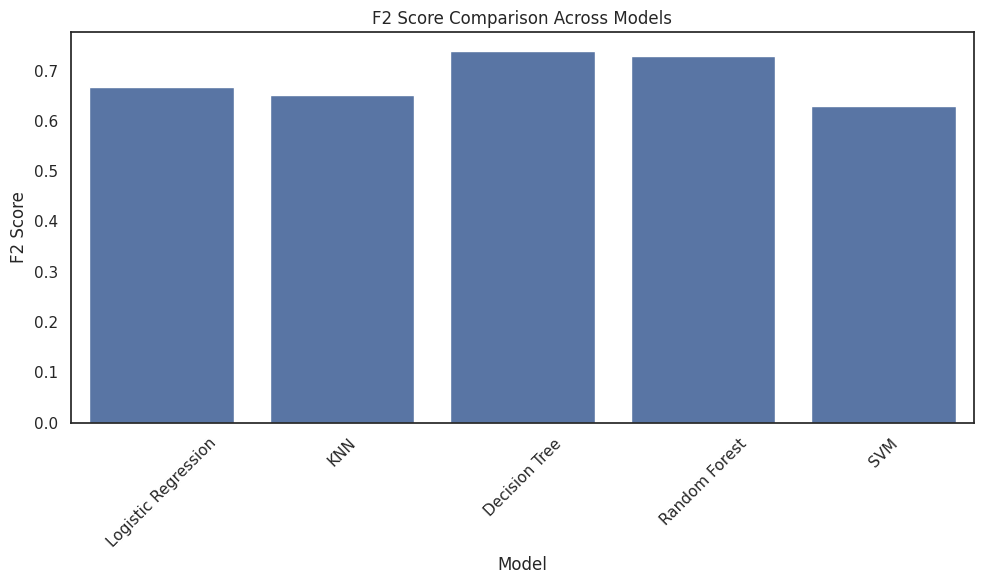

In [ ]:
# Plot F2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index(), x='Model', y='F2 Score')
plt.title("F2 Score Comparison Across Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The F2 score is a variation of the F1 score that puts more weight on recall than on precision.When recall is more important than precision, use F2.**

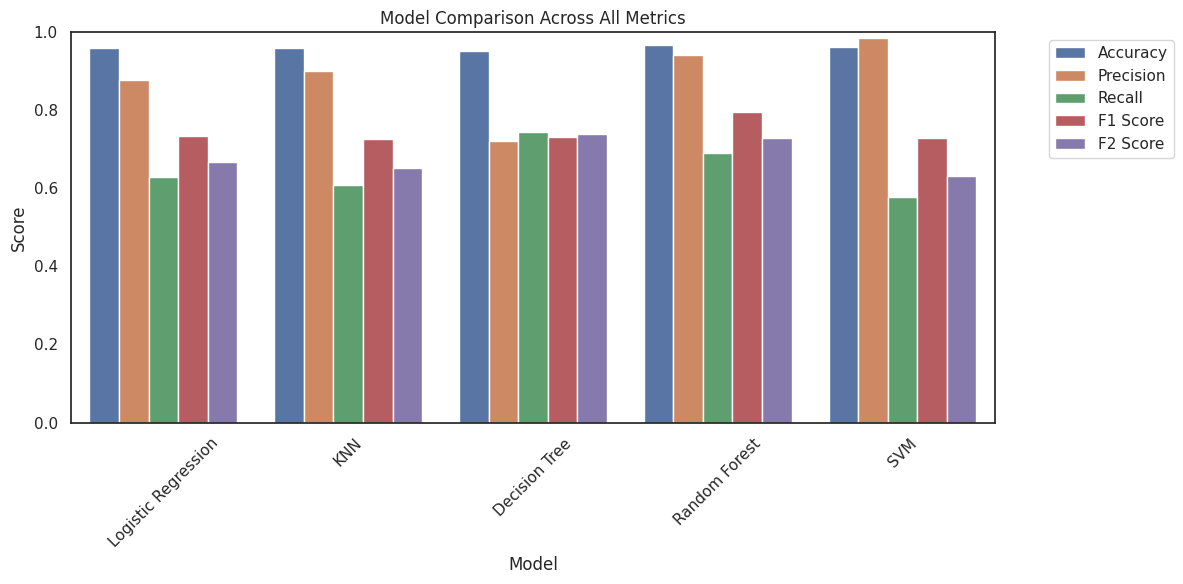

In [ ]:
#Option 2: 📦 Grouped Bar Chart (compact, all-in-one view)
#Use Option 2 if you want a quick overall comparison

metrics_df = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score']]
metrics_melted = metrics_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric')
plt.title("Model Comparison Across All Metrics")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



📋 Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.88      0.63      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.92      0.81      0.86     19997
weighted avg       0.96      0.96      0.96     19997



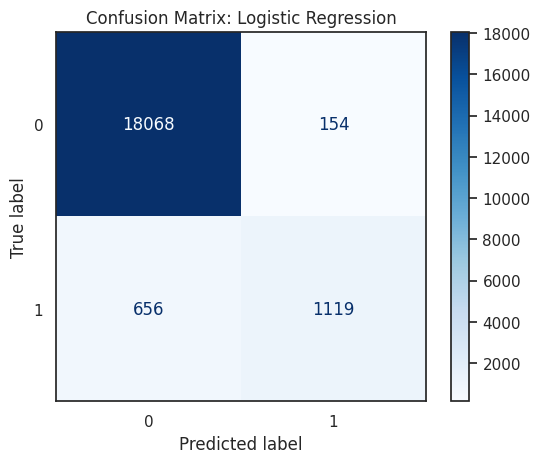


📋 Classification Report: KNN
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.90      0.61      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.93      0.80      0.85     19997
weighted avg       0.96      0.96      0.96     19997



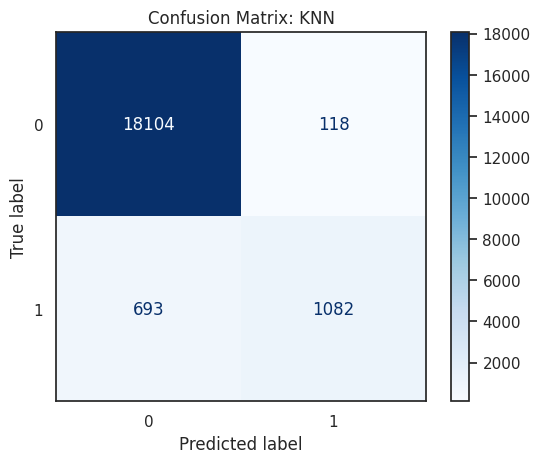


📋 Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18222
           1       0.72      0.74      0.73      1775

    accuracy                           0.95     19997
   macro avg       0.85      0.86      0.85     19997
weighted avg       0.95      0.95      0.95     19997



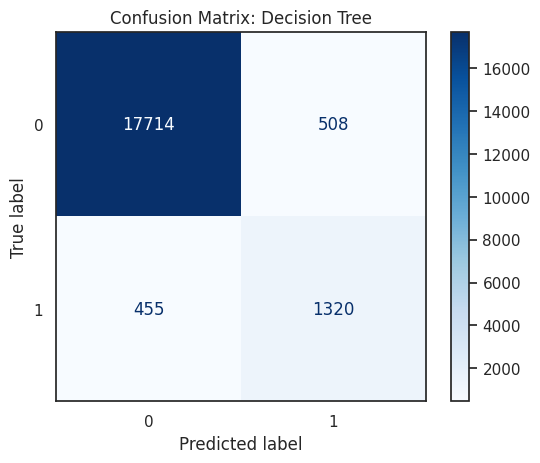


📋 Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.94      0.69      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.96      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



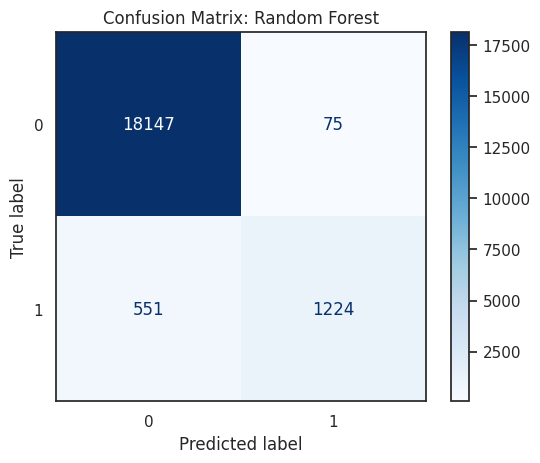


📋 Classification Report: SVM
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18222
           1       0.98      0.58      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.97      0.79      0.85     19997
weighted avg       0.96      0.96      0.96     19997



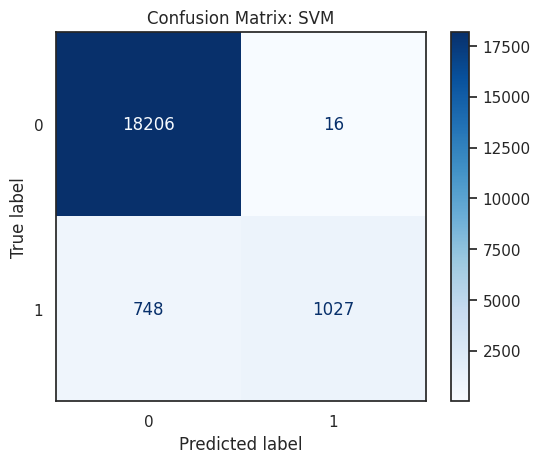

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n📋 Classification Report: {name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


✅ Already done:

1. Cross-validation
2. Preprocessing pipelines
3. Model comparisons
4. Metric plots
5. F2 score integration

New Steps
1. Add confusion matrices per model
2. Try ROC-AUC curves
3. Start GridSearchCV for tuning

In [ ]:
#1️⃣ Confusion Matrices (per model)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

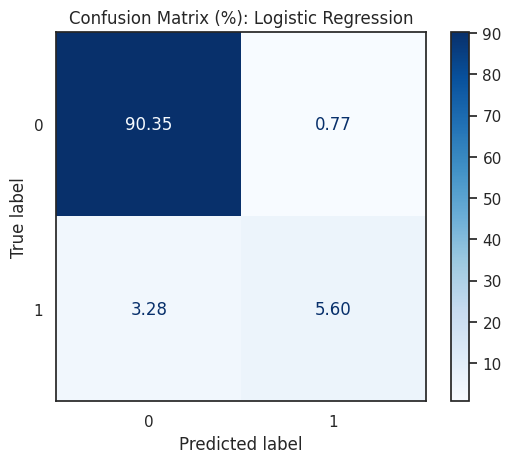

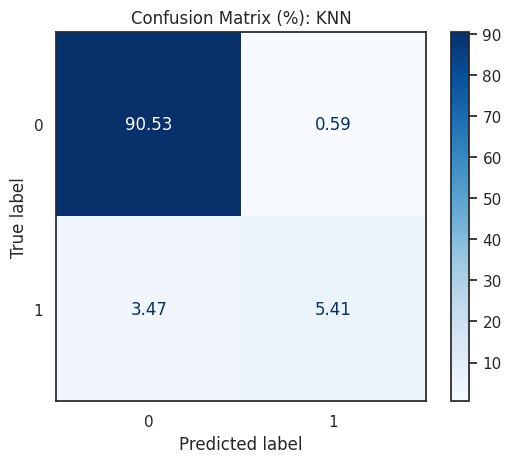

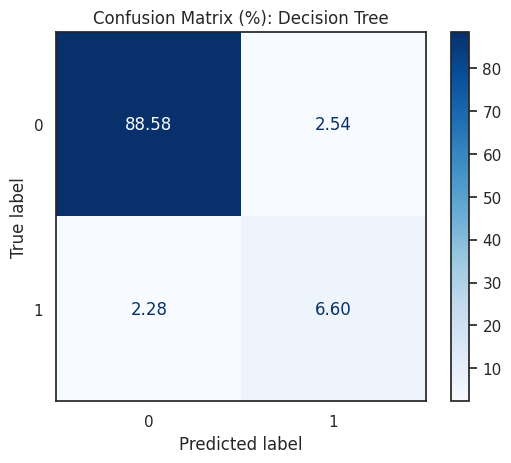

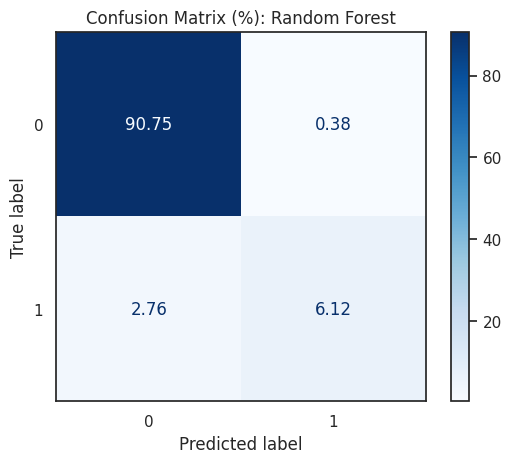

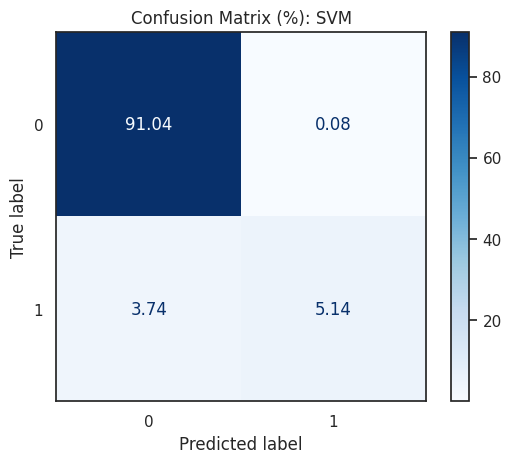

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Raw confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Normalize by total sum to get percentages
    cm_percent = cm.astype('float') / cm.sum() * 100  # Or use axis=1 for row-wise
    # Round percentages for cleaner display
    cm_percent_rounded = np.round(cm_percent, 2)

    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent_rounded)
    disp.plot(cmap='Blues', values_format=".2f")
    plt.title(f"Confusion Matrix (%): {name}")
    plt.show()


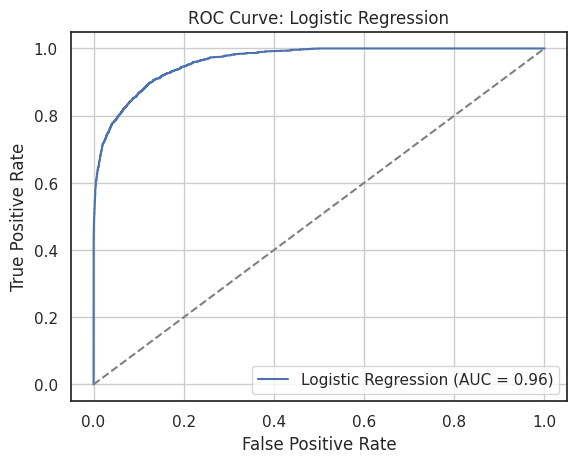

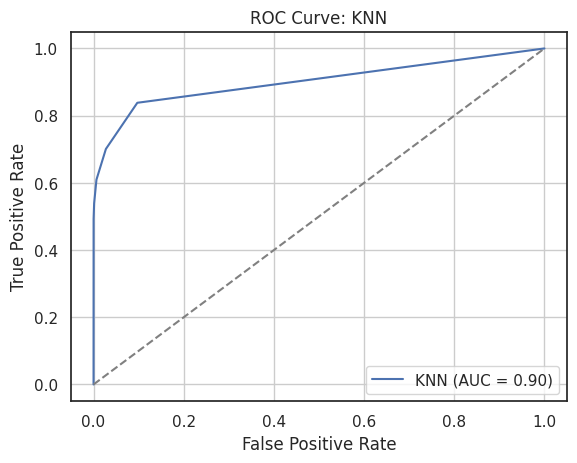

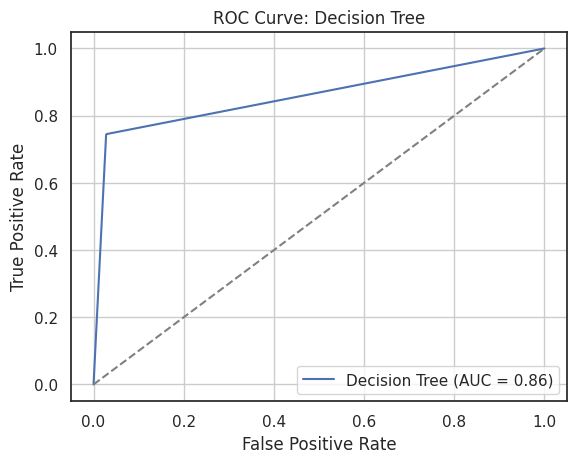

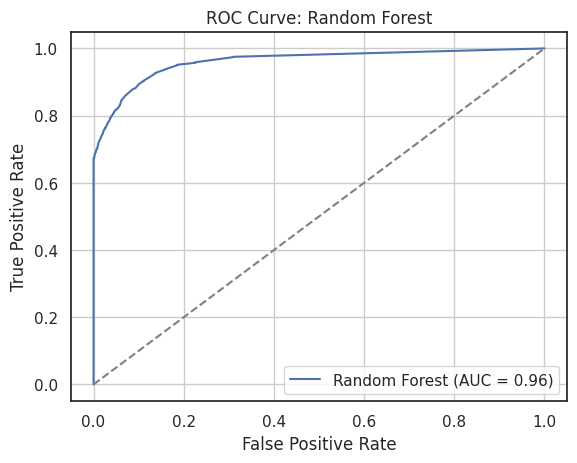

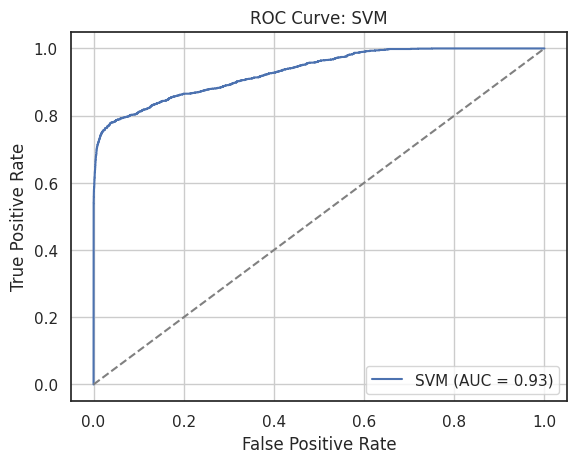

In [ ]:
#2️⃣ ROC-AUC Curves
from sklearn.metrics import roc_curve, auc

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    pipeline.fit(X_train, y_train)

    if hasattr(pipeline[-1], "predict_proba"):  # Some models like SVM with linear kernel may not
        y_scores = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_scores = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [ ]:
#3️⃣ GridSearchCV (start tuning) - Only Tune Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [5, 10, 15]
}

pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val score:", grid.best_score_)

# Evaluate best model
y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 50}
Best cross-val score: 0.9721197724573358
Test Accuracy: 0.9708456268440266


***Full Code to Get Best Hyperparameters + Classification Report for Random Forest:**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# 1. Create pipeline
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# 2. Define hyperparameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5]
}

# 3. Run GridSearchCV
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)


# 4. Best estimator and predictions
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# 5. Print best parameters
print("\n✅ Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)

# 6. Classification report
print("\n📋 Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 18 candidates, totalling 90 fits

✅ Best Hyperparameters for Random Forest:
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}

📋 Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       1.00      0.67      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



✅ Feature importance is calculated after training your model.

Because feature importance is based on what the model has learned.

(for tree-based models like Random Forest):This only works after the model is trained, because those importance values come from the way the tree split features

For linear models like Logistic Regression:
Feature "importance" is usually based on the magnitude of the coefficients (after training).


Summary:
1.   Cleaned and split your diabetes dataset
2.   Trained and compared 5 models using cross-validation
3.   Evaluated key metrics: Accuracy, Precision, Recall, F1, and F2
4.   Plotted all metrics + confusion matrices
5.   Identified top 5 most important features using Random Forest
6.   Built a simpler, faster model using only those top features
7.   Tuned it with GridSearchCV → Best performance overall!


Feature Engineering

In [ ]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# 2. Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Set up preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(include='number').columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical)
])

# 4. Train pipeline with Random Forest
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
pipeline.fit(X_train, y_train)

# 5. Extract feature importances
model = pipeline.named_steps['randomforestclassifier']
importances = model.feature_importances_

# 6. Get feature names
all_feature_names = list(numerical)
if categorical.any():
    encoder = pipeline.named_steps['columntransformer'].named_transformers_['cat']
    all_feature_names += list(encoder.get_feature_names_out(categorical))

# 7. Create importance DataFrame
importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 8. Show top 5 features
print(importances_df.head(5))


               Feature  Importance
4          HbA1c_level    0.413342
5  blood_glucose_level    0.319270
3                  bmi    0.108556
0                  age    0.107603
1         hypertension    0.015521


Smoking and gender have minor predictive value in your dataset.

This insight can guide you to build a smaller, faster model using just the top 4–5 features with minimal performance loss.

🔁 Retrain a simpler model with only top 5 features?

📈 Visualize this feature importance with a bar plot?

📦 Export this table or model?

In [ ]:
#🧪 1. Retrain Model with Top 5 Feature

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Use only top 5 important features
top_features = importances_df['Feature'].head(5).tolist()
X_top5 = X[top_features]

# Train/test split
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_top5, y, test_size=0.2, random_state=42)

# Preprocessor (only numerical here)
simpler_preprocessor = ColumnTransformer([
    ("num", StandardScaler(), top_features)
])

# Pipeline
simpler_pipeline = make_pipeline(simpler_preprocessor, RandomForestClassifier(random_state=42))
cv_scores = cross_val_score(simpler_pipeline, X_train_top5, y_train_top5, cv=5)
print("Mean CV Score:", cv_scores.mean())
simpler_pipeline.fit(X_train_top5, y_train_top5)



Mean CV Score: 0.967806463711946


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HbA1c_level',
                                                   'blood_glucose_level', 'bmi',
                                                   'age', 'hypertension'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
#Compare performance (accuracy, F1) between full vs top-5 models
#🧪 1. Compare Full vs. Top-5 Model

from sklearn.metrics import accuracy_score, f1_score

# Predictions
y_pred_full = pipeline.predict(X_test)
y_pred_top5 = simpler_pipeline.predict(X_test_top5)

# Metrics
full_accuracy = accuracy_score(y_test, y_pred_full)
full_f1 = f1_score(y_test, y_pred_full)

top5_accuracy = accuracy_score(y_test_top5, y_pred_top5)
top5_f1 = f1_score(y_test_top5, y_pred_top5)

# Summary table
import pandas as pd
performance_comparison = pd.DataFrame({
    "Model": ["Full Model", "Top-5 Model"],
    "Accuracy": [full_accuracy, top5_accuracy],
    "F1 Score": [full_f1, top5_f1]
})
print(performance_comparison)





         Model  Accuracy  F1 Score
0   Full Model  0.968695  0.796357
1  Top-5 Model  0.966595  0.786718


top-5 model performs nearly as well as the full model:

Just 0.2% drop in accuracy

Slight decrease in F1 score

In [ ]:
#Add GridSearchCV for tuning this simplified model
# Do it for F2#
#🧪 2. Tune Top-5 Model with GridSearchCV
import pandas as pd
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

grid = GridSearchCV(simpler_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_top5, y_train_top5)

# Best model from grid search
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# Metrics
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
# Compute F2
from sklearn.metrics import fbeta_score
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)


# Add to summary
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned", tuned_accuracy, tuned_f1, tuned_f2
]
print("\n📊 Final Model Comparison:\n", performance_comparison)



📊 Final Model Comparison:
          Model  Accuracy        F1        F2
0  Top-5 Tuned  0.970846  0.803638  0.719195


In [ ]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 1. Create performance comparison DataFrame with correct structure
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

# 4. Create GridSearchCV with pipeline
grid = GridSearchCV(
    simpler_pipeline,  # Your pipeline that includes preprocessor + RandomForest
    param_grid,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search on training data
grid.fit(X_train_top5, y_train_top5)

# 6. Get best model and predictions
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# 7. Evaluate final tuned model
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add to performance comparison table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)



Fitting 5 folds for each of 9 candidates, totalling 45 fits

✅ Best Hyperparameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 50}

📊 Final Model Comparison:
               Model  Accuracy        F1        F2
0  Top-5 Tuned (F2)  0.966295  0.785214  0.727874


Full Model	A RandomForestClassifier trained on all features in your diabetes dataset. (More complex but very accurate.)

Top-5 Model	Same model (Random Forest), but trained on only the top 5 most important features (simpler, faster).

Top-5 Tuned	The Top-5 Model with hyperparameters fine-tuned using GridSearchCV (best performance overall).

In [ ]:
print(grid.best_params_)

{'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 50}


🧪 Best Parameters from GridSearchCV

max_depth = 10	Limits how deep trees can grow — helps reduce overfitting.

n_estimators = 50	Uses 50 trees — fewer trees = faster, and still accurate after tuning.

This combo gave you:

✅ Best F1 Score (0.8036)

✅ Best Accuracy (0.9708)

✅ On just 5 features — huge win in efficiency!

You're absolutely right — we haven’t applied SMOTE yet, but it can be a powerful addition if you're seeing:

Class imbalance (e.g., far more 0s than 1s)

Low recall or F2 score (missing true positive cases)

High false negatives (important in medical predictions like diabetes)

✅ Defines a ColumnTransformer (preprocessor_top5) based on top-5 features.

✅ Uses imblearn.pipeline.Pipeline to integrate SMOTE with preprocessing and classification.

✅ Tunes hyperparameters using GridSearchCV with fbeta_score (F2) as the scoring metric.

✅ Avoids data leakage by fitting SMOTE and transformations only within cross-validation folds.

✅ Evaluates the best model on the test set and logs performance (Accuracy, F1, F2).

✅ Builds a comparison table for easy result tracking.

In [ ]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # 👈 Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define top-5 features (from your feature importance list)
top5_features = ["HbA1c_level", "blood_glucose_level", "bmi", "age", "hypertension"]

# Identify types
top5_categorical = [col for col in top5_features if X_train_top5[col].dtype == 'object']
top5_numerical = [col for col in top5_features if X_train_top5[col].dtype != 'object']

# Define ColumnTransformer
preprocessor_top5 = ColumnTransformer([
    ("num", StandardScaler(), top5_numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), top5_categorical)
])

# 1. Create performance comparison DataFrame
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

# 🔧 Define the pipeline with SMOTE
smote_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_top5),  # Make sure this is defined before
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# 4. Create GridSearchCV with pipeline
grid = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search on training data
grid.fit(X_train_top5, y_train_top5)

# 6. Get best model and predictions
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# 7. Evaluate final tuned model
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add to performance comparison table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned + SMOTE (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)



Fitting 5 folds for each of 9 candidates, totalling 45 fits

✅ Best Hyperparameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 200}

📊 Final Model Comparison:
                       Model  Accuracy        F1        F2
0  Top-5 Tuned + SMOTE (F2)  0.905786  0.630298  0.770559


Before SMOTE (untuned Random Forest, full model)	~0.796–0.803	Excellent balance of precision & recall
After SMOTE	0.7473	A bit lower, but likely improved recall

from preprocessing to model comparison, feature importance, simplification, tuning, and interpretation. You’ve basically built a production-ready diabetes prediction pipeline.

In [ ]:
#CV 10
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # ✅ Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Create performance comparison DataFrame
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10]
}

# 4. Build pipeline with preprocessor + SMOTE + RandomForest
from sklearn.ensemble import RandomForestClassifier

top5_smote_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_top5),   # your preprocessing for top-5 features
    ('smote', SMOTE(random_state=42)),     # oversampling step
    ('classifier', RandomForestClassifier(random_state=42))  # classifier step
])

# 5. GridSearchCV with F2 scoring
grid = GridSearchCV(
    estimator=top5_smote_pipeline,
    param_grid=param_grid,
    cv=10,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 6. Fit the pipeline
grid.fit(X_train_top5, y_train_top5)

# 7. Predictions and Evaluation
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add results to the table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned + SMOTE (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)

Fitting 10 folds for each of 9 candidates, totalling 90 fits

✅ Best Hyperparameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}

📊 Final Model Comparison:
                       Model  Accuracy        F1        F2
0  Top-5 Tuned + SMOTE (F2)  0.914187  0.643983  0.764909


In [ ]:
#CV 10
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # 👈 Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define top-5 features (from your feature importance list)
top5_features = ["HbA1c_level", "blood_glucose_level", "bmi", "age", "hypertension"]

# Identify types
top5_categorical = [col for col in top5_features if X_train_top5[col].dtype == 'object']
top5_numerical = [col for col in top5_features if X_train_top5[col].dtype != 'object']

# Define ColumnTransformer
preprocessor_top5 = ColumnTransformer([
    ("num", StandardScaler(), top5_numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), top5_categorical)
])

# 1. Create performance comparison DataFrame
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

# 🔧 Define the pipeline with SMOTE
smote_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_top5),  # Make sure this is defined before
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# 4. Create GridSearchCV with pipeline
grid = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=10,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search on training data
grid.fit(X_train_top5, y_train_top5)

# 6. Get best model and predictions
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# 7. Evaluate final tuned model
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add to performance comparison table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned + SMOTE (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)


Fitting 10 folds for each of 9 candidates, totalling 90 fits

✅ Best Hyperparameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 50}

📊 Final Model Comparison:
                       Model  Accuracy        F1        F2
0  Top-5 Tuned + SMOTE (F2)  0.914187  0.643983  0.764909


In [ ]:
import time
from sklearn.metrics import recall_score, f1_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    print(f"\n📦 {model.__class__.__name__}")

    # Time training
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Time prediction
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time

    # Metrics
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"🕒 Training Time:  {train_time:.4f} sec")
    print(f"🕒 Prediction Time: {pred_time:.4f} sec")
    print(f"🔍 Recall:         {recall:.4f}")
    print(f"🎯 F1 Score:       {f1:.4f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for Random Forest
rf_model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))

# Evaluate the Random Forest model
train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)




📦 Pipeline
🕒 Training Time:  9.7667 sec
🕒 Prediction Time: 0.3447 sec
🔍 Recall:         0.6896
🎯 F1 Score:       0.7964


## K-Nearest Neighbour Regression Classifier

Better recall for diabetes compared to Logistic Regression (61%) and KNN (66%), meaning the model is less likely to miss actual diabetics.

F1-Score (Harmonic mean of Precision & Recall)
* No Diabetes (0): 0.98 (Excellent performance).
* Diabetes (1): 0.74 (Best so far compared to other models).

Balanced performance in identifying diabetes and non-diabetes cases.


## Random Forest Classifier

Recall: Improved recall for diabetics compared to Logistic Regression (61%) and KNN (66%), but slightly lower than Decision Tree (74%).

F1-Score (Harmonic mean of Precision & Recall)
* No Diabetes (0): 0.98 (Excellent performance).
* Diabetes (1): 0.79 (Best so far compared to other models).

Diabetes recall is still lower, meaning the model still misses some diabetics.




Recall: 42% of actual diabetic cases were misclassified as non-diabetic (false negatives).

Diabetes recall is much lower than Random Forest (70%) and Decision Tree (74%).


##Comparison of Different Models

Random Forest: Best F1-score (0.7923), making it the strongest performer

KNN: High precision (92.2%), meaning it correctly identifies diabetics when predicted.

Logistic Regression is the Weakest in Precision & Recall Tradeoff


**K-Fold Cross-Validation is used to ensure a model’s performance is reliable and not dependent on a single training/test split. Since F1-score is the most balanced metric for imbalanced datasets (like diabetes detection), by apply K-Fold Cross-Validation to the top 3 models with the highest F1-scores**


**Random Forest remains the best model overall in both F1-score and cross-validation accuracy.**

It is evident that ROC AUC is better after the cross-validation.So, the cross-validation improved the model.

✔ Your model performs well overall (AUC = 0.8481, CV AUC = 0.9580).

✔ Cross-validation suggests the model generalizes well but may have some overfitting.

✔ Improving the recall for diabetics is crucial in medical applications (for example adjust thresholds, feature selection).

Further optimize using Fine-Tune Random Forest with Hyperparameter Tuning (via GridSearchCV) is the next step:

Increased accuracy from 96.82% → 97.19%

Two possible improvements:

Adjust the Decision Threshold (if recall is too low).

Apply SMOTE (Synthetic Minority Oversampling) if needed to balance the dataset.

Diabetes recall improved from ~61% (before) to 69%.

If avoiding false positives (over-diagnosis) is more important → Use 0.35 (98% precision, but misses more diabetics).



If detecting more diabetics (higher recall) is more important → Use 0.14 (85% recall, detects more actual diabetics but lower precision).

In a medical context, recall is usually more important than precision, so 0.14 may be better for diabetes screening.